In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import torch

In [2]:
image_path = 'path/to/your/image.jpg'
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_height, image_width = image.shape[:2]

[ WARN:0@2.042] global loadsave.cpp:248 findDecoder imread_('path/to/your/image.jpg'): can't open/read file: check file path/integrity


error: OpenCV(4.9.0) /io/opencv/modules/imgproc/src/color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


In [29]:
image_height = 416
image_width = 416
grid_size = [52, 26, 13]  # 예: 52x52  그리드
anchors = [[16, 30], [62, 45], [156, 198]]
cell_width = []
cell_height = []
for i in range(len(grid_size)):
    cell_width.append(image_width // grid_size[i])
    cell_height.append(image_height // grid_size[i])

In [34]:
s = 2
blank_grid = np.ones((image_height, image_width,3), dtype=np.uint8)*255
for i in range(grid_size[s]):
    for j in range(grid_size[s]):
        start_x = j * cell_width[s]
        start_y = i * cell_height[s]
        end_x = start_x + cell_width[s]
        end_y = start_y + cell_height[s]
        cv2.rectangle(blank_grid, (start_x, start_y), (end_x, end_y), (255, 0, 0), 1)
        if i == grid_size[s]//2 and j == grid_size[s]//2:
            center_x = (start_x+end_x) // 2
            center_y = (start_y+end_y) // 2

anchor = anchors[s]
anchor_width, anchor_height = anchor
top_left_x = center_x + anchor_width // 2 
top_left_y = center_y + anchor_height // 2
print(top_left_x, top_left_y)
bottom_right_x = center_x - anchor_width // 2
bottom_right_y = center_y - anchor_height // 2
print(bottom_right_x, bottom_right_y)
cv2.rectangle(blank_grid, (top_left_x, top_left_y), (bottom_right_x, bottom_right_y), (0, 0, 255), 2)

286 307
130 109


array([[[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        ...,
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0]],

       [[255,   0,   0],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255,   0,   0],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255,   0,   0],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255,   0,   0],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255,   0,   0],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

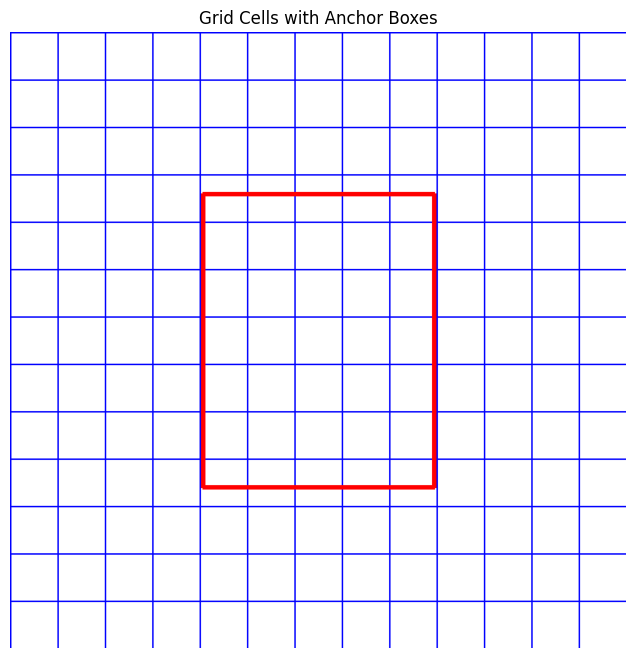

In [35]:
plt.figure(figsize=(8, 8))
plt.imshow(cv2.cvtColor(blank_grid, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Grid Cells with Anchor Boxes')
plt.show()